In [17]:
using HDF5
using Statistics
using Measurements

In [64]:
using Plots
gr(
    show = :ijulia, # Dynamically updating plots
    key = false,
    size = (480, 640)
)

Plots.GRBackend()

In [19]:
plotdata = true

true

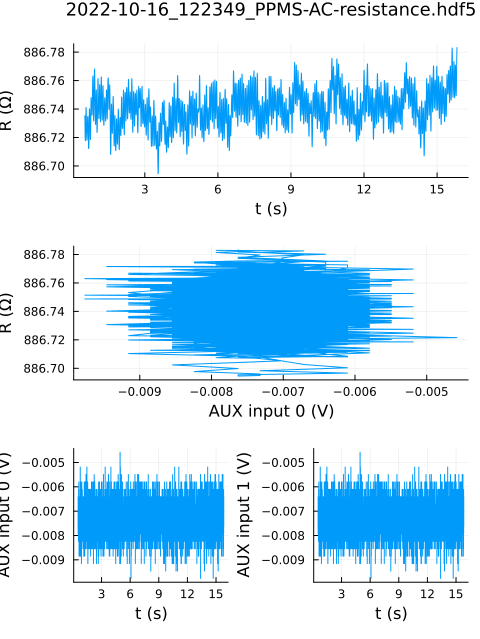

LoadError: InterruptException:

In [87]:
datadir = joinpath("Nowack_Lab_data", "2022-10-15_PPMS-AC-resistance")

activeflag = true

layout = @layout [
    a{1.0w}
    b{1.0w}
    c{0.5w} d{0.5w}
]

 while plotdata
    activeflag != activeflag
    active = activeflag ? "•" : "∘"

    latestdata = readdir(datadir)[end]
    datafile = joinpath(datadir, latestdata)
    
    # opening file in loop is perhaps sub-optimal, but works for now.
    h5open(datafile, "r"; swmr=true) do f
        meta = attrs(f)
#         title = join([meta["name"], meta["start_time"], latestdata], "\n")
        title = latestdata
        
        n = 10000
        
        t0 = f["/zurich/initial_timestamp"][]
        tb = f["/zurich/dev505/clockbase"][]
        Rb = f["/setup/bias_resistance"][]
        
        tV = f["/data/zurich/dev505/demods/0/sample/timestamp"][:]
        tI = f["/data/zurich/dev505/demods/1/sample/timestamp"][:]

        commontimes = intersect(tV, tI)
        if length(commontimes) < n
            n = length(commontimes) - 1
        end
        iV = indexin(commontimes, tV)[end-n:end]
        iI = indexin(commontimes, tI)[end-n:end]
        ts = tV[iV] # .== tI[iI]

        Vx = f["/data/zurich/dev505/demods/0/sample/x"][:][iV]
        Vy = f["/data/zurich/dev505/demods/0/sample/y"][:][iV]
        Ix = f["/data/zurich/dev505/demods/1/sample/x"][:][iI]
        Iy = f["/data/zurich/dev505/demods/1/sample/y"][:][iI]

        aux0 = f["/data/zurich/dev505/demods/0/sample/auxin0"][:][iV]
        aux1 = f["/data/zurich/dev505/demods/0/sample/auxin1"][:][iV]
        
        t = (ts .- t0) ./ tb
        Vr = sqrt.(Vx.^2 .+ Vy.^2)
        Ir = sqrt.(Ix.^2 .+ Iy.^2) ./ Rb
        R = Vr ./ Ir
        pRt = plot(t, R;
            xlabel = "t (s)",
            ylabel = "R (Ω)",
            show = false,
        )
        pRT = plot(aux0, R;
            xlabel = "AUX input 0 (V)",
            ylabel = "R (Ω)",
            show = false,
        )
        paux0 = plot(t, aux0;
            xlabel = "t (s)",
            ylabel = "AUX input 0 (V)",
            show = false,
        )
        paux1 = plot(t, aux0;
            xlabel = "t (s)",
            ylabel = "AUX input 1 (V)",
            show = false,
        )
        plot(pRt, pRT, paux0, paux1;
            layout = layout,
            plot_title = title,
            plot_titlefontsize = 12,
        )
    end
    sleep(0.1)
end